In [4]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

(640, 960, 3)


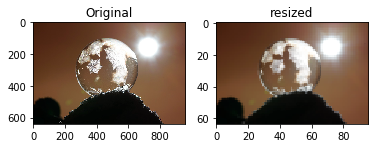

In [18]:
#-----------Q4 part B - Resize Image----------------

biomImage = cv2.imread('biom_image.jpg') #returns numpy array
rows,col = biomImage.shape[:2] 
# cv2.imshow("Original", biomImage)
# cv2.waitKey(0)
print (biomImage.shape)
resized_image = cv2.resize(biomImage,(int(col/10),int(rows/10)), interpolation = cv2.INTER_AREA)
# cv2.imshow("Resized one",resized_image)
# cv2.waitKey()
    # plt.subplot(121),plt.imshow(biomImage, cmap = 'Accent')
    # plt.title('Original')
    # plt.subplot(122),plt.imshow(resized_image)
    # plt.title('resized')

    # plt.show()

In [ ]:
# ------Q4 - Part B - Rotation-------------- 

In [ ]:
image = cv2.imread('biom_image.jpg')
row,col = img.shape[:2]

Mat = cv2.getRotationMatrix2D((col/2,row/2),90,1)
dst = cv2.warpAffine(image,Mat,(col,row))
# cv2.imshow("Original",image)
# cv2.imshow('rotatedImage',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [5]:
#0-----------Q4 part C - Adding Noise !! -------------

image = cv2.imread('biom_image.jpg')
row,col = image.shape[:2]
# cv2.imshow('GrayscaleImage',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
salt_pepper_noise = np.zeros((row,col,3),np.uint8)


In [6]:
probablty = 0.005
for i in range(0,row):
    for j in range(0,col):
#         sum = image[i][j][0] + image[i][j][1] + image[i][j][2] 
        rand = random.random()
        if (rand < probablty):
            salt_pepper_noise[i][j][0] = 0
            salt_pepper_noise[i][j][1] = 0
            salt_pepper_noise[i][j][2] = 0
        elif (rand > (1-probablty)):
            salt_pepper_noise[i][j][0] = 255
            salt_pepper_noise[i][j][1] = 255
            salt_pepper_noise[i][j][2] = 255            
        else:
            salt_pepper_noise[i][j][0] = image[i][j][0]
            salt_pepper_noise[i][j][1] = image[i][j][1]
            salt_pepper_noise[i][j][2] = image[i][j][2]

# cv2.imshow('Salt_pepper_noise',salt_pepper_noise)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [17]:
# filters - High pass filter - Low pass filter - 
# convolution - Spatial domain

# 1. Median Filter

medianFilter_image = cv2.medianBlur(salt_pepper_noise,3)
# cv2.imshow('MedianFilter', medianFilter_image)


# 2. Mean Filter 

meankernel = np.ones((3,3),np.float32)/9
meanfilter_image = cv2.filter2D(salt_pepper_noise,-1,meankernel)
# cv2.imshow('MeanFilter',meanfilter_image)


# 3. Gaussian Filter

gaussian = cv2.GaussianBlur(salt_pepper_noise,(5,5),0)
# cv2.imshow('GaussianFilter',gaussian)

# cv2.waitKey()
# cv2.destroyAllWindows()

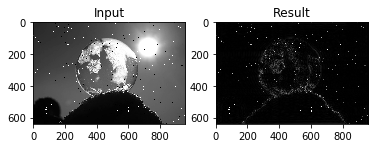

In [7]:
# Frequency Domain

image = cv2.cvtColor(salt_pepper_noise, cv2.COLOR_RGB2GRAY)
rows,col = image.shape

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f) # shift center
row = int(rows/2)
coll = int(col/2)
fshift[row-30:row+30, coll-30:coll+30] = 0

fi_shift = np.fft.ifftshift(fshift) # shift back
img = np.fft.ifft2(fi_shift) # inverse fft

img = np.abs(img)


plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Input')
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Result')

plt.show()


In [15]:
# from scipy import ndimage
# import Image
# import cv2
# image = cv2.cvtColor(salt_pepper_noise, cv2.COLOR_RGB2GRAY)
# rows,col = image.shape

# f = np.fft.fft2(image)
# fshift = np.fft.fftshift(f) # shift center
# row = int(rows/2)
# coll = int(col/2)

# kernel = np.array([[-1, -1, -1],
#                    [-1,  8, -1],
#                    [-1, -1, -1]])

# highpass = ndimage.convolve(fshift,kernel) 


# fi_shift = np.fft.ifftshift(highpass) # shift back
# img = np.fft.ifft2(fi_shift) # inverse fft

# img = np.abs(img)

# plt.subplot(121),plt.imshow(image,cmap = 'gray')
# plt.title('Input')
# plt.subplot(122),plt.imshow(img,cmap = 'gray')
# plt.title('Result')

# plt.show()

In [ ]:
# -------Q4 D - GAUSSIAN AND LAPLACIAN PYRAMID -------------

(640, 960, 3)


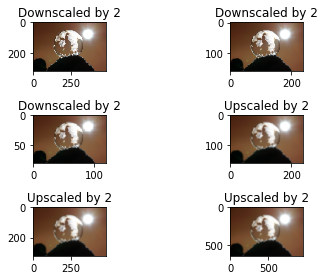

In [14]:
def plot(data, title):
    plot.i += 1
    plt.subplot(3,2,plot.i)
    plt.imshow(data)
    plt.title(title)

plot.i = 0
img = cv2.imread('biom_image.jpg')
row,col = img.shape[:2]
print(img.shape)
for i in range(0,6):
#     print(int(col/2),int(row/2))
    if(i < 3):
        col,row = int(col/2), int(row/2)
        img = cv2.pyrDown(img, dstsize=(col,row))
        plot(img,'Downscaled by 2')
    else:
        col,row = int(col*2),int(row*2)
        img = cv2.pyrUp(img, dstsize=(col,row))
        plot(img,'Upscaled by 2')
plt.tight_layout()
plt.show()